___
# Ciência dos Dados - Projeto 1

Felipe Aron Nudelman Tabacinik

## Título do projeto

Segurança alimentar nos estados brasileiros - Disponibilidade de água canalizada para a população de menor renda com enfoque nas regiões do país

___
## Introdução

Analisar a disponibilidade de água canalizada para a população de menor renda implicando na boa lavagem dos alimentos a serem consumidos, no próprio consumo de água e em higiene básica.

## Pergunta

Qual a relação entre a falta de água canalizada em ao menos um cômodo de habitações com a pobreza dos Estados e o que isso interfere na segurança alimentar dos moradores?


___
## Análise e Resultados

In [77]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [78]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Felipe Aron\Documents\Insper\2A\Ciência dos Dados\Projeto 1


## Dados

Chamando os dados dos arquivos.csv pelo método pd.read_csv()

In [79]:
dados = pd.read_csv('DOM2009.csv',sep=',')

dados_new = pd.read_csv('DOM2013.csv',sep=',')

### Váriaveis de interesse

Fazendo os slices nos dados com a utilização do método 'loc' que utiliza string's como índices

In [80]:
interesse = dados.loc[:,['UF','V0105','V0211','V0215','V4622','V4623']]

interesse_new = dados.loc[:,['UF','V0105','V0211','V0215','V4622','V4623']]

### Transformação V0211

Transformando os valores 1 (Tem água canalizada em pelo menos um cômodo da casa) e 3 (Não tem água canalizada em pelo menos um cômodo na casa) em Canalizada e Não canalizada, respectivamente.

In [81]:
interesse.V0211 = interesse.V0211.astype('category')
interesse.V0211.cat.categories = ('Canalizada','Não canalizada')

interesse_new.V0211 = interesse_new.V0211.astype('category')
interesse_new.V0211.cat.categories = ('Canalizada', 'Não Canalizada')

### Regiões

Criando a variável 'Reg' que agloba os valores de UF em 5 grupos (Norte, Nordeste, Sudeste, Sul e Centro-Oeste)

In [82]:
interesse['Reg'] = interesse.UF
interesse.Reg[(interesse.UF>10)&(interesse.UF<=17)]=1
interesse.Reg[(interesse.UF>20)&(interesse.UF<30)]=2
interesse.Reg[(interesse.UF>30)&(interesse.UF<36)]=3
interesse.Reg[(interesse.UF>37)&(interesse.UF<46)]=4
interesse.Reg[(interesse.UF>49)&(interesse.UF<54)]=5

interesse_new['Reg'] = interesse_new.UF
interesse_new.Reg[(interesse_new.UF>10)&(interesse_new.UF<=17)]=1
interesse_new.Reg[(interesse_new.UF>20)&(interesse_new.UF<30)]=2
interesse_new.Reg[(interesse_new.UF>30)&(interesse_new.UF<36)]=3
interesse_new.Reg[(interesse_new.UF>37)&(interesse_new.UF<46)]=4
interesse_new.Reg[(interesse_new.UF>49)&(interesse_new.UF<54)]=5

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

### Transformação UF, V0215, V4623 e Reg

Transformando os valores de UF nos nomes respectivos dos Estados.
___
Transformando os valores da váriavel 'Reg' nos nomes das regiões do Brasil.
___
Transformando os valores da variável 'V0215' pelo método de avisar ao programa que essa variável é uma categoria e depois utilizando o cat.categories()

In [83]:
interesse.UF = interesse.UF.astype('category')
interesse.UF.cat.categories = ('Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas','Sergipe','Bahia', 'Minas Gerais', 'Espirito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná','Santa Catarina','Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'DF')
interesse.Reg = interesse.Reg.astype('category')
interesse.Reg.cat.categories = ('Norte','Nordeste','Sudeste','Sul','Centro-Oeste')
interesse.V0215 = interesse.V0215.astype('category')
interesse.V0215.cat.categories = ('Tem banheiro no domícilio', 'Não tem banheiro no domícilio')
interesse.V4623 = interesse.V4623.astype('category')
interesse.V4623.cat.categories = ('Tem morador menor de 18 anos e tem segurança alimentar', 'Tem morador menor de 18 anos e insegurança alimentar leve','Tem morador menor de 18 anos e insegurança alimentar moderada','Tem morador menor de 18 anos e insegurança alimentar grave','Não tem morador menor de 18 anos e tem segurança alimentar','Não tem morador menor de 18 anos e insegurança alimentar leve','Não tem morador menor de 18 anos e insegurança alimentar moderada','Não tem morador menor de 18 anos e insegurança alimentar grave')

interesse_new.UF = interesse_new.UF.astype('category')
interesse_new.UF.cat.categories = ('Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas','Sergipe','Bahia', 'Minas Gerais', 'Espirito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná','Santa Catarina','Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'DF')
interesse_new.Reg = interesse_new.Reg.astype('category')
interesse_new.Reg.cat.categories = ('Norte','Nordeste','Sudeste','Sul','Centro-Oeste')
interesse_new.V0215 = interesse_new.V0215.astype('category')
interesse_new.V0215.cat.categories = ('Tem banheiro no domícilio', 'Não tem banheiro no domícilio')
interesse_new.V4623 = interesse_new.V4623.astype('category')
interesse_new.V4623.cat.categories = ('Tem morador menor de 18 anos e tem segurança alimentar', 'Tem morador menor de 18 anos e insegurança alimentar leve','Tem morador menor de 18 anos e insegurança alimentar moderada','Tem morador menor de 18 anos e insegurança alimentar grave','Não tem morador menor de 18 anos e tem segurança alimentar','Não tem morador menor de 18 anos e insegurança alimentar leve','Não tem morador menor de 18 anos e insegurança alimentar moderada','Não tem morador menor de 18 anos e insegurança alimentar grave')

### Limpa para os interesses e DataFrame limpo

Limpando o DataFrame com o método dropna()

In [84]:
interesse = interesse.dropna(0,how='any')

interesse.head()

,UF,V0105,V0211,V0215,V4622,V4623,Reg
2,Rondônia,7,Canalizada,Não tem banheiro no domícilio,2,Tem morador menor de 18 anos e insegurança ali...,Norte
3,Rondônia,3,Canalizada,Tem banheiro no domícilio,5,Não tem morador menor de 18 anos e tem seguran...,Norte
4,Rondônia,1,Canalizada,Tem banheiro no domícilio,4,Não tem morador menor de 18 anos e tem seguran...,Norte
6,Rondônia,2,Canalizada,Tem banheiro no domícilio,2,Tem morador menor de 18 anos e tem segurança a...,Norte
7,Rondônia,4,Canalizada,Tem banheiro no domícilio,3,Tem morador menor de 18 anos e tem segurança a...,Norte


In [85]:
interesse_new = interesse_new.dropna(0,how='any')

interesse_new.head()

,UF,V0105,V0211,V0215,V4622,V4623,Reg
2,Rondônia,7,Canalizada,Não tem banheiro no domícilio,2,Tem morador menor de 18 anos e insegurança ali...,Norte
3,Rondônia,3,Canalizada,Tem banheiro no domícilio,5,Não tem morador menor de 18 anos e tem seguran...,Norte
4,Rondônia,1,Canalizada,Tem banheiro no domícilio,4,Não tem morador menor de 18 anos e tem seguran...,Norte
6,Rondônia,2,Canalizada,Tem banheiro no domícilio,2,Tem morador menor de 18 anos e tem segurança a...,Norte
7,Rondônia,4,Canalizada,Tem banheiro no domícilio,3,Tem morador menor de 18 anos e tem segurança a...,Norte


### Água não canalizada

Mostrando os atributos da váriavel V0211 imprecindível ao projeto

In [86]:
naocanalizada = interesse[interesse.V0211!=3]
naocanalizada.V0211.value_counts()

Canalizada        112406
Não canalizada      8504
Name: V0211, dtype: int64

### Brasil - Água canalizada e não nos domicílios

Plotagem do gráfico do valor absoluto da quantidade de domícilios com água canalizada em pelo menos um cômodo e não.

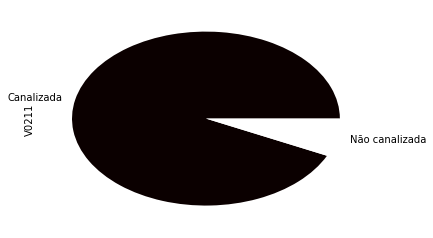

In [88]:
brasilgrafico = interesse.V0211.value_counts()

brasilgrafico.plot(kind='pie',colormap = 'hot')

### Cross entre estados e água canalizada e não canalizada

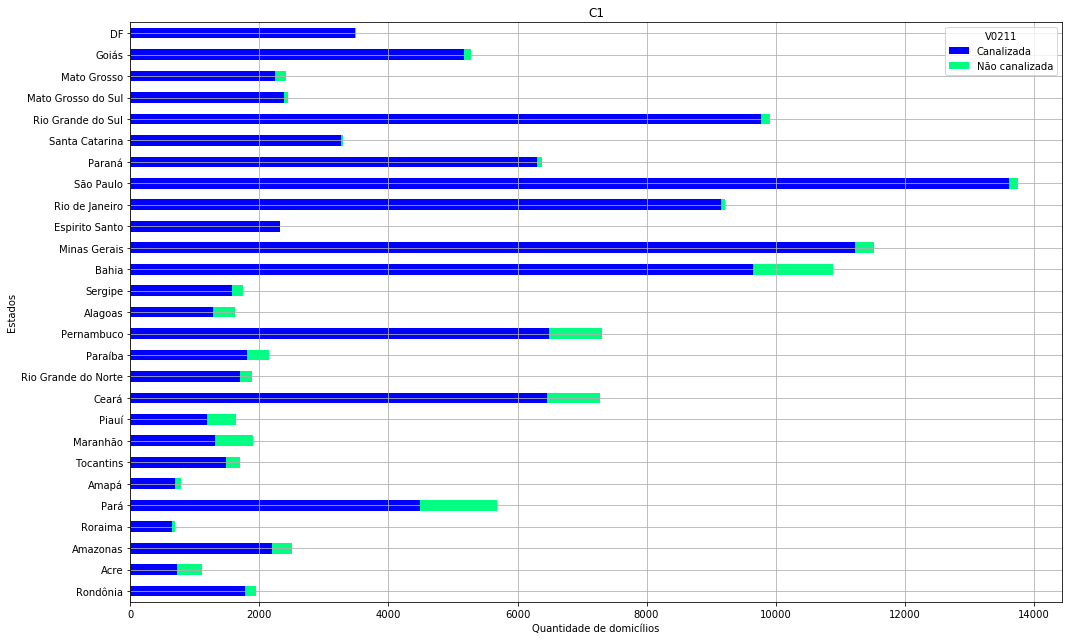

In [89]:
c1 = pd.crosstab(interesse.UF,interesse.V0211)

c1.plot(kind='barh',title='Quantidade de domicílios por Estado que tem água canalizada e não', colormap='winter', stacked = True, figsize = (15,9),grid=True)
plt.title('C1')
plt.xlabel('Quantidade de domicílios')
plt.ylabel('Estados')
plt.tight_layout()
plt.show()

Tentando evidenciar a a falta de água canalizada (que garante maior disponibilidade de água) no Norte e Nordeste do país, a plotagem do gráfico acima mostra que a quantidade de domícilios sem água canalizada nessas regiões é maior que nas regiões Sul, Sudeste e Centro-Oeste

### Cross entre Regiões e água canalizada e não canalizada

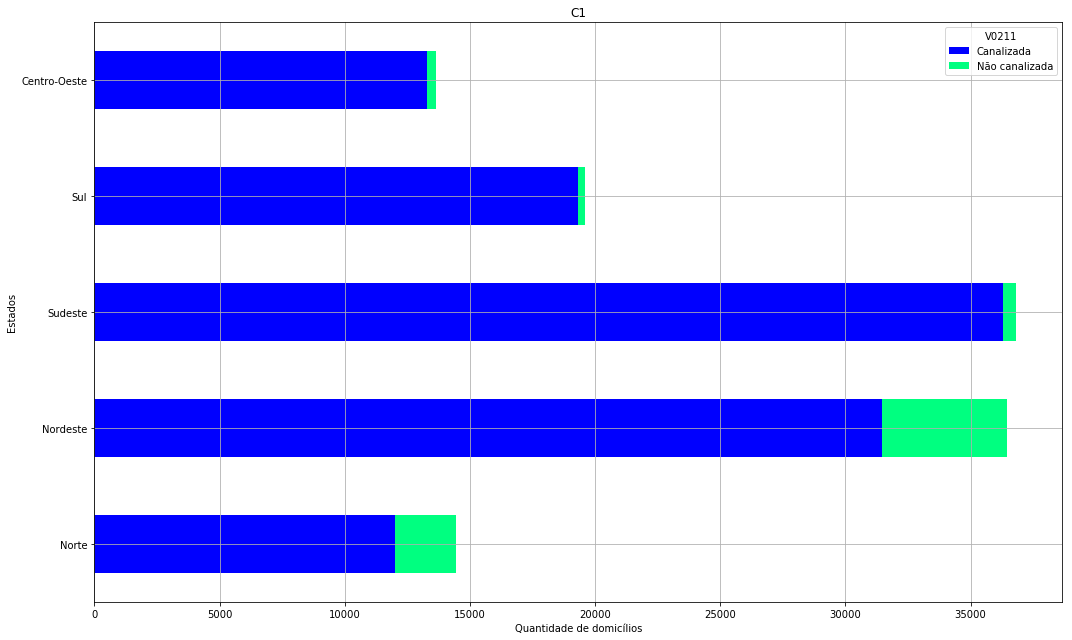

In [90]:
c3 = pd.crosstab(interesse.Reg,interesse.V0211)

c3.plot(kind='barh',title='Quantidade de domicílios por Estado que tem água canalizada e não', colormap="winter", stacked = True, figsize = (15,9),grid=True)
plt.title('C3')
plt.xlabel('Quantidade de domicílios')
plt.ylabel('Estados')
plt.tight_layout()
plt.show()

### Cross entre renda per capita nos domícilios e Regiões

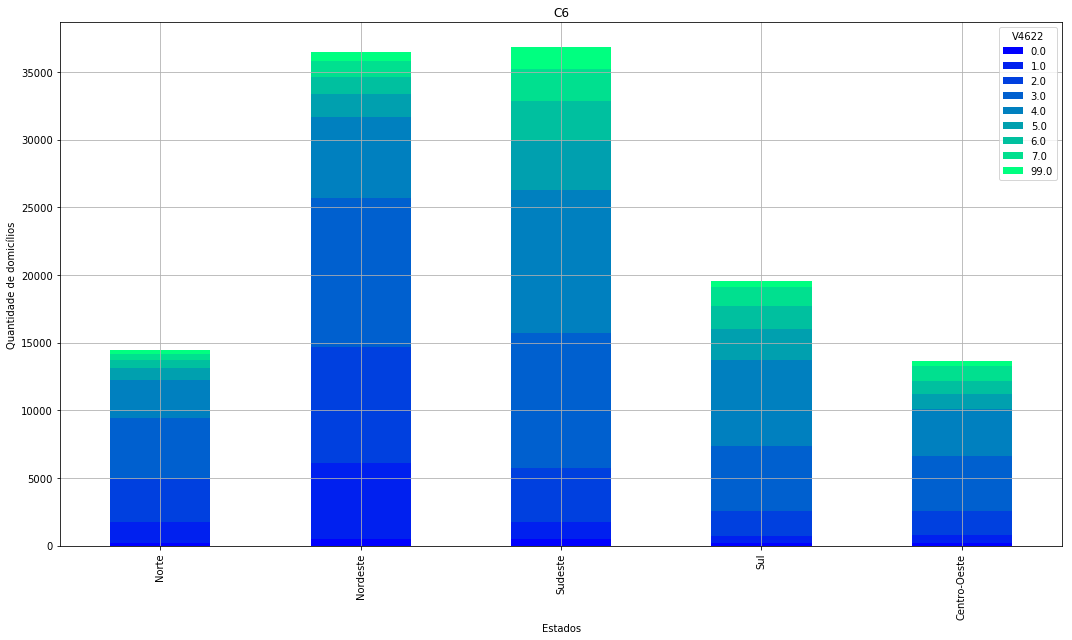

In [102]:
c6 = pd.crosstab(interesse.Reg,interesse.V4622)

c6.plot(kind='bar',title='Quantidade de domicílios por Estado que tem água canalizada e não', colormap='winter', stacked = True, figsize = (15,9),grid=True)
plt.title('C6')
plt.xlabel('Estados')
plt.ylabel('Quantidade de domicílios')
plt.tight_layout()
plt.show()

Visivelmente pelos gráficos as regiões Norte e Nordeste sofrem com a falta de água canalizada em uma grande parte de seus domícilios, o que dificulta o consumo de água, a lavagem de alimentos e a higiene básica --> precariedade da segurança alimentar

### Cross entre Renda per capita em salários mínimos e água canalizada e não canalizada

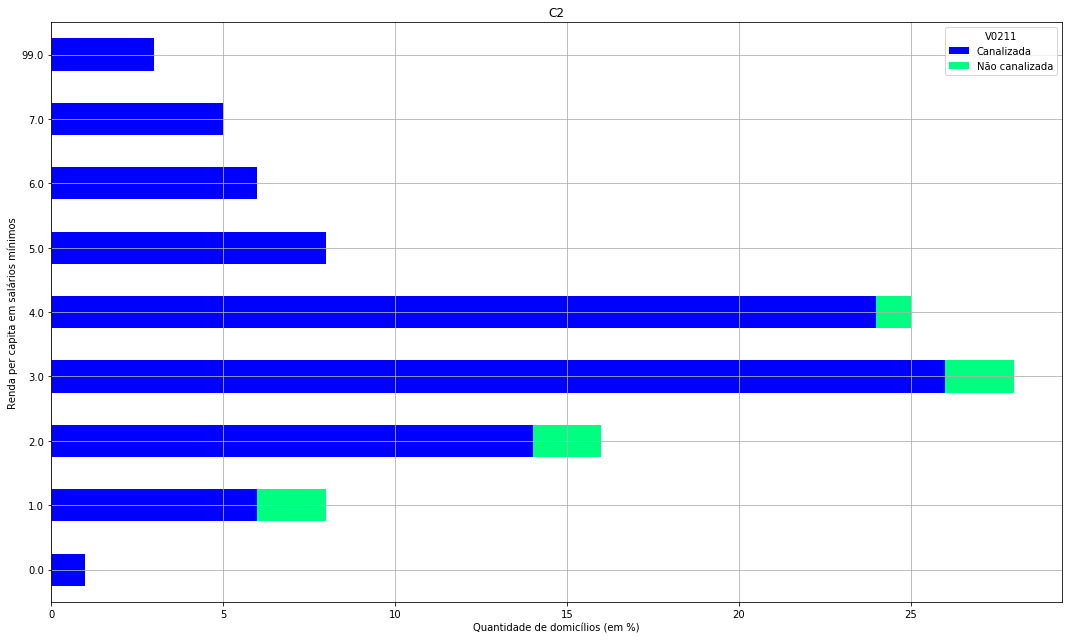

In [95]:
c2 = pd.crosstab(interesse.V4622,interesse.V0211)
c2 = (c2/c2.sum().sum()*100).round(decimals=0)

c2.plot(kind='barh', colormap='winter', stacked = True, figsize=(15,9),grid=True)
plt.title('C2')
plt.xlabel('Quantidade de domicílios (em %)')
plt.ylabel('Renda per capita em salários mínimos')
plt.tight_layout()
plt.show()

A parte da população que mais sofre com a falta de água canalizada está entre as que tem renda per capita entre 0 e 2 salários mínimos.

### Cross entre quantidade de moradores e se tem banheiro na propriedade --> Higiene Básica

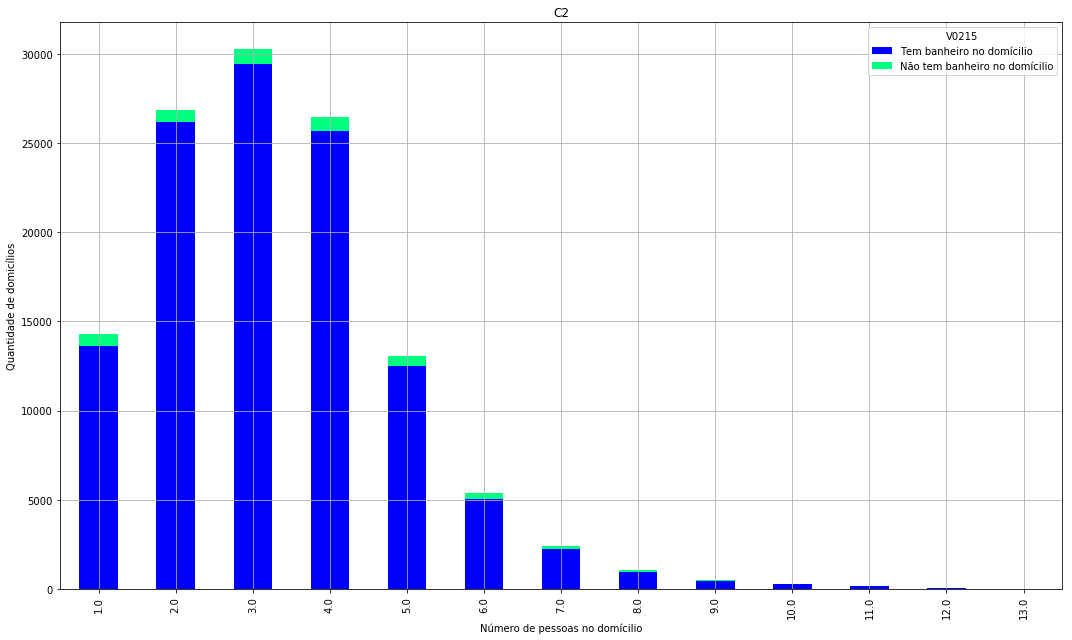

In [92]:
c5 = pd.crosstab(interesse.V0105[interesse.V0105 <14],interesse.V0215)

c5.plot(kind='bar', colormap='winter', stacked = True, figsize=(15,9),grid=True)
plt.title('C5')
plt.xlabel('Número de pessoas no domícilio')
plt.ylabel('Quantidade de domicílios')
plt.tight_layout()
plt.show()

### Cross entre situação da segurança alimentar no domícilio com água não canalizada

Para tentar evidenciar a relação direta entre a falta de água canalizada e a insegurança alimentar, utilizamos o crosstab que relaciona as duas váriaveis e seus valores tentando encontrar uma solução que retorne uma explicação ao problema

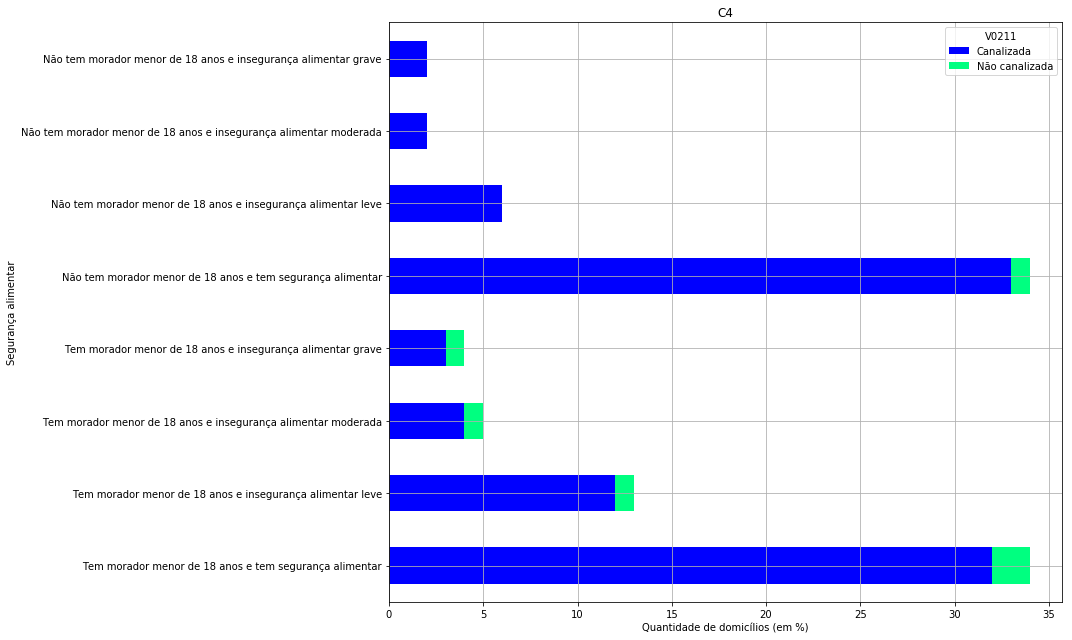

In [103]:
c4 = pd.crosstab(interesse.V4623,interesse.V0211)
c4 = (c4/c4.sum().sum()*100).round(decimals=0)

c4.plot(kind='barh', colormap='winter', stacked = True, figsize=(15,9),grid=True)
plt.title('C4')
plt.xlabel('Quantidade de domicílios (em %)')
plt.ylabel('Segurança alimentar')
plt.tight_layout()
plt.show()

Aparentemente a falta de água canalizada impacta diretamente no aumento da insegurança alimentar uma vez que as maiores barras do gráfico são relacionadas a água canalizada e com segurança alimentar.

## Conclusão

Descreva aqui suas conclusões!

A grande conclusão do projeto está relacionada a disponibilidade de água canalizada em ao menos um cômodo da casa como impactante na segurança alimentar. Os domícilios que tinham maior disponibilidade de água canalizada apontaram os melhores índices de segurança alimentar. Além disso foi possível mostrar que os estados com menor renda per capita nos domícilios (Norte e Nordeste) têm os menores indíces de água canalizada nos mesmos domícilios. Isso porque não existe uma maior atenção e investimento na área de proveniência do bem mais precioso ao homem.